# Загрузка бибилиотек и базы данных.

In [ ]:
# Работа с массивами данных
import numpy as np
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils
# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential
# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Работа с google диском
from google.colab import drive
# Загрузка датасетов из облака google
import gdown
# Функции операционной системы
import os
# Регулярные выражения
import re
# Очистка памяти
import gc
# Отрисовка графиков
import matplotlib.pyplot as plt

In [ ]:
# Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)

# Распаковка архива в папку writers
!unzip -qo writers.zip -d writers/

# Просмотр содержимого папки
!ls writers

'(Булгаков) Обучающая_5 вместе.txt'	    '(О. Генри) Обучающая_50 вместе.txt'
'(Булгаков) Тестовая_2 вместе.txt'	    '(О. Генри) Тестовая_20 вместе.txt'
'(Клиффорд_Саймак) Обучающая_5 вместе.txt'  '(Рэй Брэдберри) Обучающая_22 вместе.txt'
'(Клиффорд_Саймак) Тестовая_2 вместе.txt'   '(Рэй Брэдберри) Тестовая_8 вместе.txt'
'(Макс Фрай) Обучающая_5 вместе.txt'	    '(Стругацкие) Обучающая_5 вместе.txt'
'(Макс Фрай) Тестовая_2 вместе.txt'	    '(Стругацкие) Тестовая_2 вместе.txt'


In [ ]:
# Папка с текстовыми файлами
FILE_DIR  = 'writers'

# Признак обучающей выборки в имени файла
SIG_TRAIN = 'обучающая'

# Признак тестовой выборки в имени файла
SIG_TEST  = 'тестовая'

In [ ]:
# В список добавляются имена классов
CLASS_LIST = []

# Здесь сохраняются тексты для обучения сети
text_train = []

# А здесь для проверки точности сети
text_test = []

# цикл для итерации по каждому имени текста в общей папке
for file_name in os.listdir(FILE_DIR):

    # Выделение имени класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)

    # Если выделение получилось, то файл обрабатывается
    if m:

        # отдельно берём имя класса (автора)
        class_name = m[1]

        # отдельно - имя выборки
        subset_name = m[2].lower()

        # Проверка типа выборки по названию в имени файла
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая или тестовая - файл обрабатывается
        if is_train or is_test:

            # Добавление нового класса, если его еще нет в списке
            if class_name not in CLASS_LIST:

                # Выводится информационное сообщение о добавлении названия класса
                CLASS_LIST.append(class_name)

                # Инициализация соответствующих классу строк текста
                text_train.append('')
                text_test.append('')

            # Поиск индекса класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)

            # Выводится информационное сообщение о добавлении класса в список классов и текста к выборке
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')

            # оператор with - безопасное чтение каждого файла с текстом
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:

                # Загрузка содержимого файла в строку
                text = f.read()

            # Определение выборки, куда будет добавлено содержимое
            subset = text_train if is_train else text_test

            # Добавление текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определим кол-во классов
CLASS_COUNT = len(CLASS_LIST)

Добавление файла "(Макс Фрай) Тестовая_2 вместе.txt" в класс "Макс Фрай", тестовая выборка.
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление файла "(О. Генри) Обучающая_50 вместе.txt" в класс "О. Генри", обучающая выборка.
Добавление файла "(Стругацкие) Тестовая_2 вместе.txt" в класс "Стругацкие", тестовая выборка.
Добавление файла "(Макс Фрай) Обучающая_5 вместе.txt" в класс "Макс Фрай", обучающая выборка.
Добавление файла "(Рэй Брэдберри) Обучающая_22 вместе.txt" в класс "Рэй Брэдберри", обучающая выборка.
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление файла "(Рэй Брэдберри) Тестовая_8 вместе.txt" в класс "Рэй Брэдберри", тестовая выборка.
Добавление файла "(О. Генри) Тестовая_20 вместе.txt" в класс "О. Генри", тестовая выборка.
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление файла "(Булгаков) Обуч

In [ ]:
# Объем словаря для токенизатора
VOCAB_SIZE = 15000
# Длина отрезка текста (окна) в словах
WIN_SIZE   = 3000
# Шаг окна разбиения текста на векторы
WIN_HOP    = 300

# Токенайзер из Keras для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

Отдельно запускаем Токенайзер на выборке текстов для обучения сети:


In [ ]:
# Формируем словарь частотности по обучающим текстам
tokenizer.fit_on_texts(text_train)

Функцией **texts_to_sequences( )** переформатируем обучающие и проверочные тексты в последовательность индексов:

In [ ]:
# Обучающие тексты переводим в индексы слов по частотному словарю
seq_train = tokenizer.texts_to_sequences(text_train)

# Проверочные тексты переводим в индексы слов по частотному словарю
seq_test = tokenizer.texts_to_sequences(text_test)

#Специальные функции для формирования выборок.



##1. **split_sequence( )** - функция деления последовательности индексов на отрезки скользящим окном

In [ ]:
def split_sequence(sequence,   # Последовательность индексов
                   win_size,   # Размер окна для деления на примеры
                   hop):       # Шаг окна

    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

##2. **vectorize_sequence( )** - функция формирования выборок из индексов и соответствующих классам меток

In [ ]:
def vectorize_sequence(seq_list,    # Список последовательностей индексов
                       win_size,    # Размер окна для деления на примеры
                       hop):        # Шаг окна

    # В списке последовательности следуют в порядке их классов (их кол-во сповпадает с кол-вом классов)
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):

        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)

        # Добавление отрезков в выборку

        x += vectors

        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

Теперь переходим к формированию выборок с помощью данных функций:

In [ ]:
# Формирование обучающей выборки
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
# Формирование тестовой выборки
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Проверка формы сформированных данных
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5842, 3000) (5842, 6)
(2190, 3000) (2190, 6)


Переводим данные в формат Bag Of Words методом  **sequences_to_matrix( )**:

In [ ]:
# На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование к типу данных 'список'
x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

# Выводим форму обучающей выборки в виде матрицы Bag of Words
print(x_train_01.shape)
# Выводим фрагмент отрезка обучающего текста в виде Bag of Words
print(x_train_01[0][0:100])

(5842, 15000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0.]


#Пробная нейронка

In [ ]:
model_BoW = Sequential()                                            # Создание последовательной модели нейросети
model_BoW.add(Dense(128, input_dim=VOCAB_SIZE, activation="relu"))  # Первый полносвязный слой
model_BoW.add(Dense(64, activation="relu"))                         # Второй полносвязный слой
model_BoW.add(Dense(32, activation="relu"))                         # Третий полносвязный слой
model_BoW.add(BatchNormalization())                                 # Слой пакетной нормализации
model_BoW.add(Dropout(0.1))                                         # Слой регуляризации Dropout
model_BoW.add(Dense(CLASS_COUNT, activation='softmax'))             # Выходной полносвязный слой

model_BoW.compile(optimizer='adam',                                 # Компиляция модели для обучения на данных вида Bag of Words
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Модель нейронной сети по классификации писателей готова к обучению на Bag Of Words:

In [ ]:
# Обучение сети с помощью функции fit()
history = model_BoW.fit(x_train_01,                            # Обучающая выборка Bag of Words
                        y_train,                               # Метки классов обучающей выборки
                        epochs=15,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test_01, y_test))   # Проверочная выборка и метки классов проверочной выборки

Epoch 1/15
183/183 [==============================] - 2s 7ms/step - loss: 0.1636 - accuracy: 0.9754 - val_loss: 0.3528 - val_accuracy: 0.9347
Epoch 2/15
183/183 [==============================] - 1s 5ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.9584
Epoch 3/15
183/183 [==============================] - 1s 6ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 0.9680
Epoch 4/15
183/183 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.9685
Epoch 5/15
183/183 [==============================] - 1s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2193 - val_accuracy: 0.9626
Epoch 6/15
183/183 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2101 - val_accuracy: 0.9626
Epoch 7/15
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2037 - val_accuracy: 0.9621
Epoch 

 Мы добились точности обучения сети на проверочной выборке в 95%.

# Проведём ещё ряд тестов

##Разработаем функцию создающую нейронные сети с заданным числом Dense слоем.

In [ ]:
def make_model (x_train, y_train, x_val, y_val, dense_neuron_counts, vocab_size, drop_rate = 0.2):
  model_BoW = Sequential()                                            # Создание последовательной модели нейросети
  model_BoW.add(Dense(dense_neuron_counts[0], input_dim = vocab_size, activation="relu"))  # Первый полносвязный слой
  for i in dense_neuron_counts[1:]:
    model_BoW.add(Dense(i, activation="relu"))                        # Полносвязный слой
  model_BoW.add(BatchNormalization())                                 # Слой пакетной нормализации
  model_BoW.add(Dropout(drop_rate))                                         # Слой регуляризации Dropout
  model_BoW.add(Dense(CLASS_COUNT, activation='softmax'))             # Выходной полносвязный слой
  model_BoW.compile(optimizer='adam',                                 # Компиляция модели для обучения на данных вида Bag of Words
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  # Обучение сети с помощью функции fit()
  store_learning = model_BoW.fit(x_train,                            # Обучающая выборка Bag of Words
                                y_train,                               # Метки классов обучающей выборки
                                epochs=15,                             # Количество эпох
                                batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                                validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки
    # Создание полотна для рисунка
  plt.figure(1, figsize=(18, 5))

  # Задание первой (левой) области для построения графиков
  plt.subplot(1, 2, 1)
  # Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
  plt.plot(store_learning.history['loss'],
          label='Значение ошибки на обучающем наборе')
  plt.plot(store_learning.history['val_loss'],
          label='Значение ошибки на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Значение ошибки')
  plt.legend()

  # Задание второй (правой) области для построения графиков
  plt.subplot(1, 2, 2)
  # Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
  plt.plot(store_learning.history['accuracy'],
          label='Доля верных ответов на обучающем наборе')
  plt.plot(store_learning.history['val_accuracy'],
          label='Доля верных ответов на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()

  # Фиксация графиков и рисование всей картинки
  plt.show()

##Для токенизации, также, разработаем специальную функцию.

In [ ]:
def data_set_creater(vocab_size, text_train, text_test, win_hop, win_size):
  # Токенайзер из Keras для разбиения текста и построения частотного словаря
  tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                            lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
  # Формируем словарь частотности по обучающим текстам
  tokenizer.fit_on_texts(text_train)

  # Обучающие тексты переводим в индексы слов по частотному словарю
  seq_train = tokenizer.texts_to_sequences(text_train)

  # Проверочные тексты переводим в индексы слов по частотному словарю
  seq_test = tokenizer.texts_to_sequences(text_test)

  # Формирование обучающей выборки
  x_train, y_train = vectorize_sequence(seq_train, win_size, win_hop)
  # Формирование тестовой выборки
  x_test, y_test = vectorize_sequence(seq_test, win_size, win_hop)

  #Переводим данные в формат Bag Of Words методом sequences_to_matrix( ):
  # На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование к типу данных 'список'
  x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
  x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())
  return x_train_01, y_train, x_test_01, y_test

##Списки гиперпараметров

In [ ]:
# Объем словаря для токенизатора
VOCAB_SIZE_LST = [10000, 18000]
# Длина отрезка текста (окна) в словах
WIN_SIZE_LST   = [1000, 2000]
# Шаг окна разбиения текста на векторы
WIN_HOP_LST    = [250,500]
# Число нейронов в Dense слоях
NEURONS = [[128,64,32],[128,256,512,32]]

##Создадим и обучим нейроноки с разными параметрами:

test_ndx=1; neurons=[128, 64, 32]; vocab_size=10000; win_hop=250
Epoch 1/15
220/220 [==============================] - 11s 9ms/step - loss: 0.1414 - accuracy: 0.9782 - val_loss: 0.3330 - val_accuracy: 0.9433
Epoch 2/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0132 - accuracy: 0.9997 - val_loss: 0.2731 - val_accuracy: 0.9410
Epoch 3/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.9997 - val_loss: 0.2352 - val_accuracy: 0.9574
Epoch 4/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 0.2947 - val_accuracy: 0.9334
Epoch 5/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.2543 - val_accuracy: 0.9463
Epoch 6/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.7156
Epoch 7/15
220/220 [==============================] - 1s 6ms/step - loss: 0.0072 -

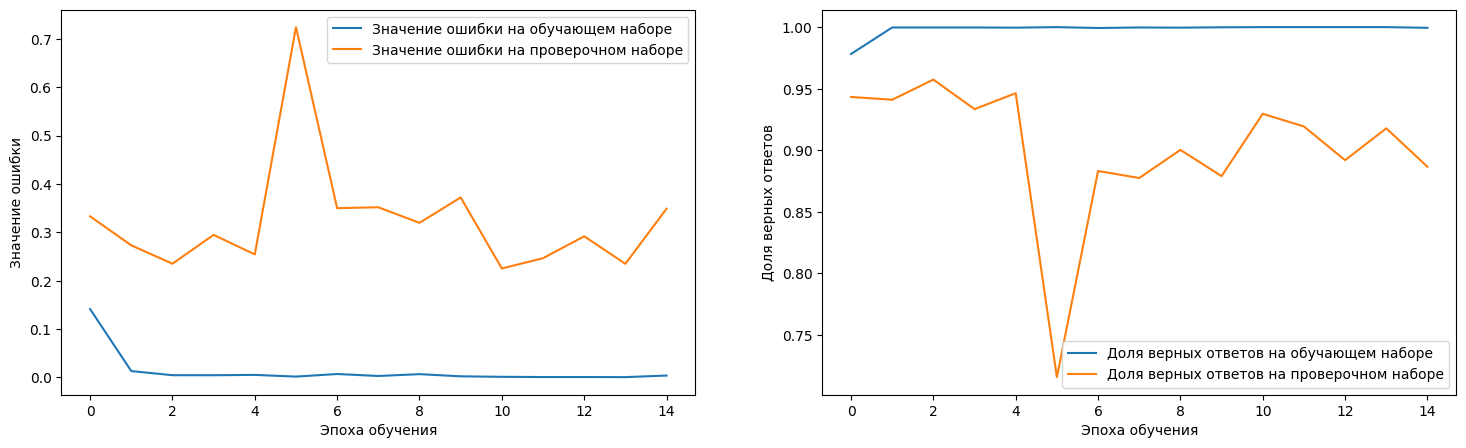

test_ndx=2; neurons=[128, 64, 32]; vocab_size=10000; win_hop=500
Epoch 1/15
110/110 [==============================] - 3s 12ms/step - loss: 0.2002 - accuracy: 0.9581 - val_loss: 0.5054 - val_accuracy: 0.8571
Epoch 2/15
110/110 [==============================] - 1s 7ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.4243 - val_accuracy: 0.8739
Epoch 3/15
110/110 [==============================] - 1s 6ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.4443 - val_accuracy: 0.8359
Epoch 4/15
110/110 [==============================] - 1s 6ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.8906
Epoch 5/15
110/110 [==============================] - 1s 6ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3953 - val_accuracy: 0.8549
Epoch 6/15
110/110 [==============================] - 1s 6ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.8549
Epoch 7/15
110/110 [==============================] - 1s 6ms/step - loss: 0.0038 -

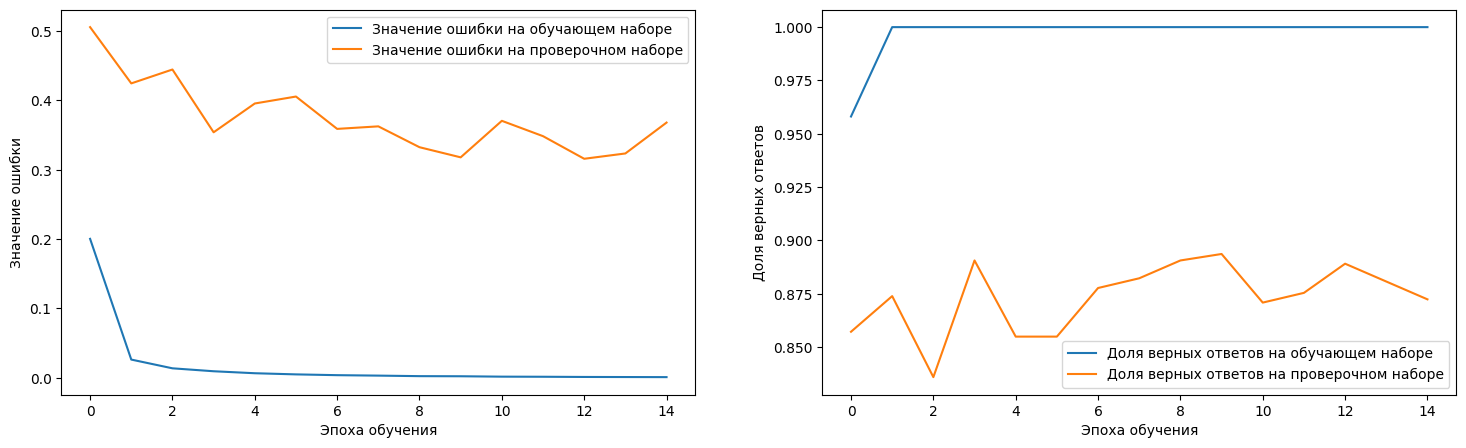

test_ndx=3; neurons=[128, 64, 32]; vocab_size=18000; win_hop=250
Epoch 1/15
220/220 [==============================] - 4s 10ms/step - loss: 0.1383 - accuracy: 0.9779 - val_loss: 0.4698 - val_accuracy: 0.8489
Epoch 2/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0207 - accuracy: 0.9994 - val_loss: 0.4275 - val_accuracy: 0.8675
Epoch 3/15
220/220 [==============================] - 2s 9ms/step - loss: 0.0094 - accuracy: 0.9999 - val_loss: 0.3705 - val_accuracy: 0.8892
Epoch 4/15
220/220 [==============================] - 2s 8ms/step - loss: 0.0063 - accuracy: 0.9997 - val_loss: 1.2248 - val_accuracy: 0.4450
Epoch 5/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0312 - accuracy: 0.9994 - val_loss: 0.6274 - val_accuracy: 0.8013
Epoch 6/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0212 - accuracy: 0.9987 - val_loss: 0.3841 - val_accuracy: 0.9197
Epoch 7/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0074 -

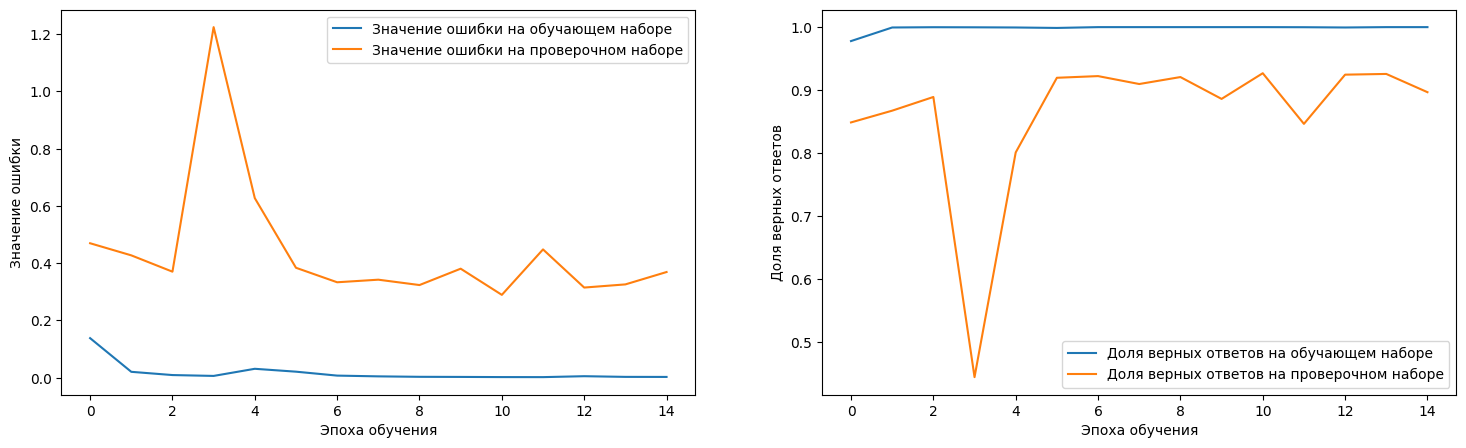

test_ndx=4; neurons=[128, 64, 32]; vocab_size=18000; win_hop=500
Epoch 1/15
110/110 [==============================] - 3s 12ms/step - loss: 0.2155 - accuracy: 0.9658 - val_loss: 0.4672 - val_accuracy: 0.8617
Epoch 2/15
110/110 [==============================] - 1s 9ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.2875 - val_accuracy: 0.9582
Epoch 3/15
110/110 [==============================] - 1s 9ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.2756 - val_accuracy: 0.9628
Epoch 4/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2676 - val_accuracy: 0.9605
Epoch 5/15
110/110 [==============================] - 1s 7ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2716 - val_accuracy: 0.9453
Epoch 6/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.2593 - val_accuracy: 0.9422
Epoch 7/15
110/110 [==============================] - 1s 7ms/step - loss: 0.0039 -

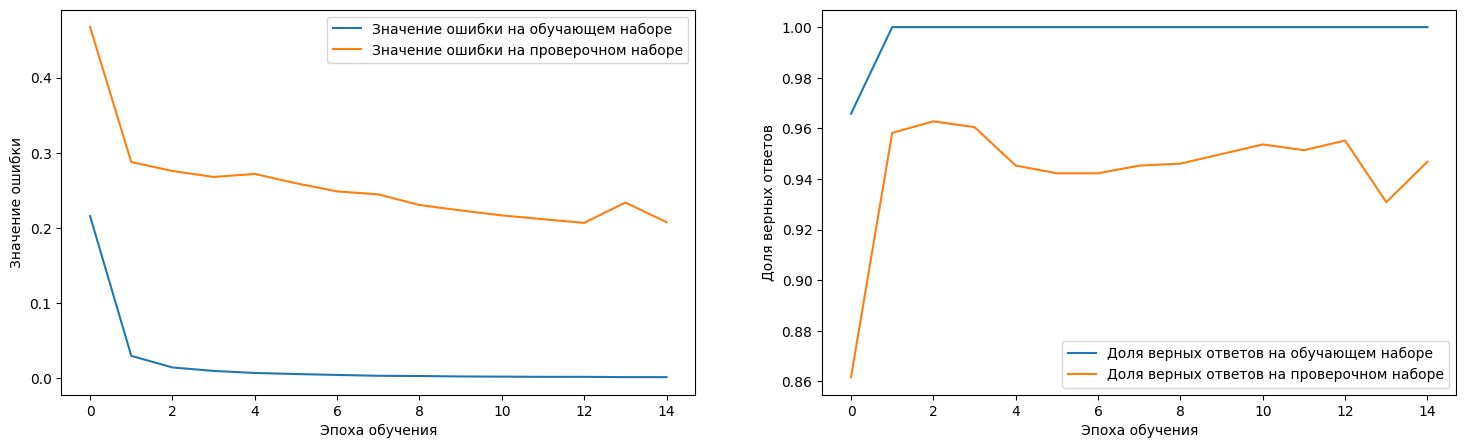

test_ndx=5; neurons=[128, 256, 512, 32]; vocab_size=10000; win_hop=250
Epoch 1/15
220/220 [==============================] - 4s 9ms/step - loss: 0.1398 - accuracy: 0.9752 - val_loss: 0.3730 - val_accuracy: 0.9159
Epoch 2/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0226 - accuracy: 0.9996 - val_loss: 0.3695 - val_accuracy: 0.8679
Epoch 3/15
220/220 [==============================] - 2s 8ms/step - loss: 0.0110 - accuracy: 0.9999 - val_loss: 0.2935 - val_accuracy: 0.9064
Epoch 4/15
220/220 [==============================] - 2s 8ms/step - loss: 0.0053 - accuracy: 0.9999 - val_loss: 0.2669 - val_accuracy: 0.9235
Epoch 5/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0081 - accuracy: 0.9996 - val_loss: 0.2072 - val_accuracy: 0.9391
Epoch 6/15
220/220 [==============================] - 1s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2409 - val_accuracy: 0.9231
Epoch 7/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0

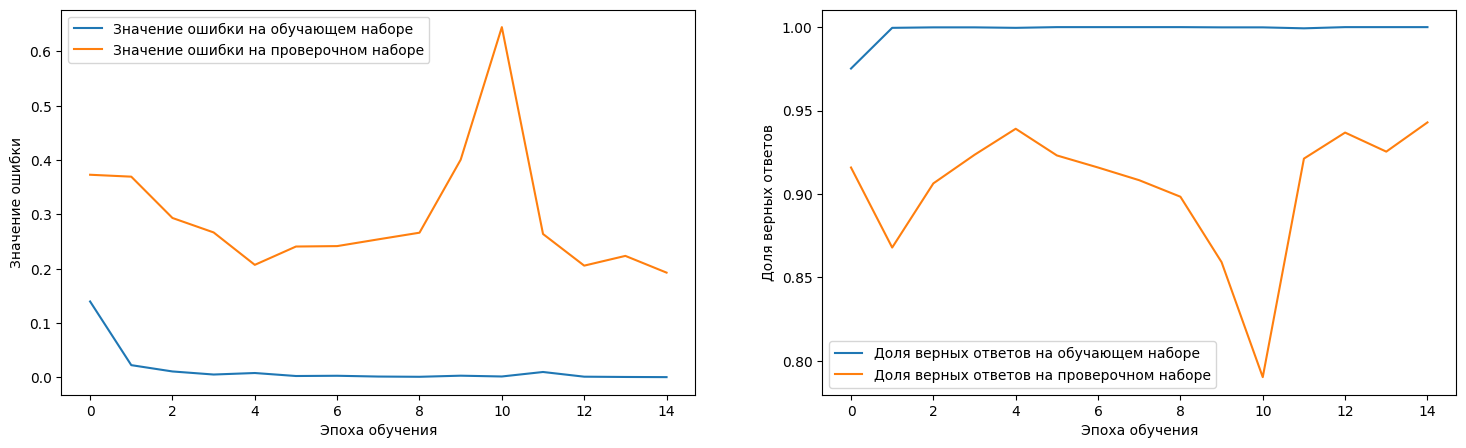

test_ndx=6; neurons=[128, 256, 512, 32]; vocab_size=10000; win_hop=500
Epoch 1/15
110/110 [==============================] - 3s 10ms/step - loss: 0.1841 - accuracy: 0.9641 - val_loss: 0.4589 - val_accuracy: 0.8541
Epoch 2/15
110/110 [==============================] - 1s 10ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.2973 - val_accuracy: 0.9445
Epoch 3/15
110/110 [==============================] - 1s 9ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.3314 - val_accuracy: 0.9073
Epoch 4/15
110/110 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2897 - val_accuracy: 0.9331
Epoch 5/15
110/110 [==============================] - 1s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.9415
Epoch 6/15
110/110 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2555 - val_accuracy: 0.9422
Epoch 7/15
110/110 [==============================] - 1s 7ms/step - loss: 0

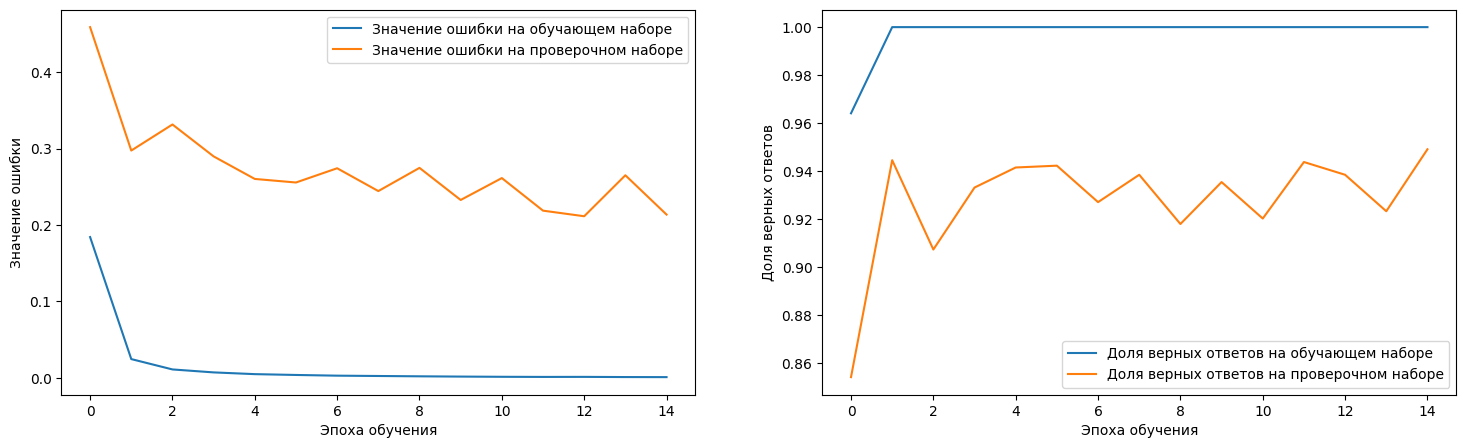

test_ndx=7; neurons=[128, 256, 512, 32]; vocab_size=18000; win_hop=250
Epoch 1/15
220/220 [==============================] - 4s 11ms/step - loss: 0.1150 - accuracy: 0.9793 - val_loss: 0.3820 - val_accuracy: 0.9022
Epoch 2/15
220/220 [==============================] - 2s 10ms/step - loss: 0.0163 - accuracy: 0.9997 - val_loss: 0.4816 - val_accuracy: 0.8272
Epoch 3/15
220/220 [==============================] - 2s 10ms/step - loss: 0.0141 - accuracy: 0.9996 - val_loss: 0.3060 - val_accuracy: 0.9246
Epoch 4/15
220/220 [==============================] - 2s 11ms/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 0.6040 - val_accuracy: 0.7693
Epoch 5/15
220/220 [==============================] - 2s 8ms/step - loss: 0.0206 - accuracy: 0.9990 - val_loss: 1.0674 - val_accuracy: 0.5550
Epoch 6/15
220/220 [==============================] - 2s 8ms/step - loss: 0.0333 - accuracy: 0.9981 - val_loss: 1.0264 - val_accuracy: 0.7008
Epoch 7/15
220/220 [==============================] - 2s 8ms/step - loss:

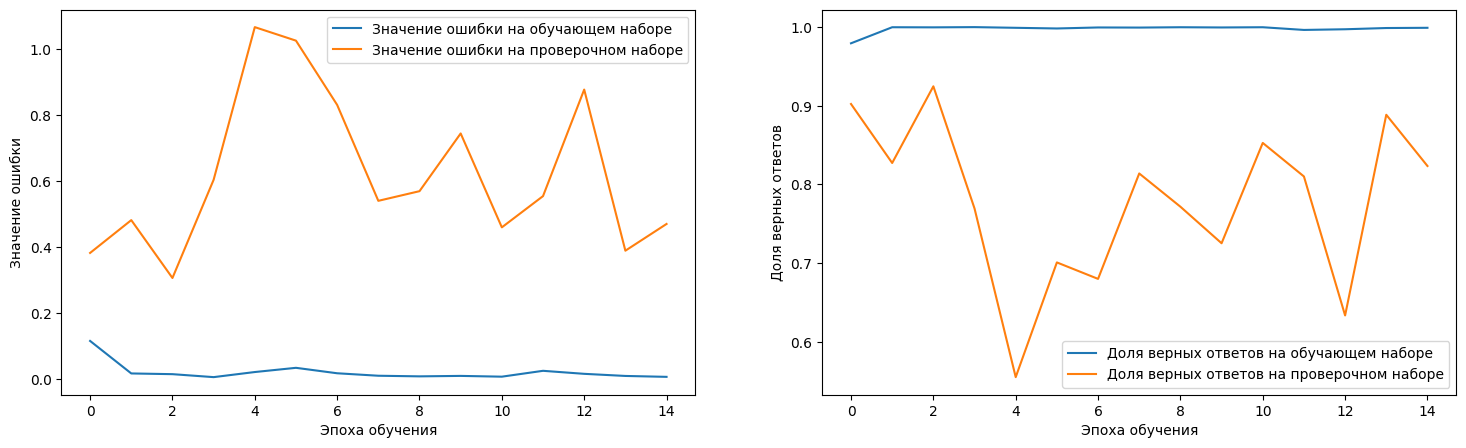

test_ndx=8; neurons=[128, 256, 512, 32]; vocab_size=18000; win_hop=500
Epoch 1/15
110/110 [==============================] - 3s 12ms/step - loss: 0.2111 - accuracy: 0.9624 - val_loss: 0.3578 - val_accuracy: 0.9506
Epoch 2/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.3893 - val_accuracy: 0.9172
Epoch 3/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.3023 - val_accuracy: 0.9491
Epoch 4/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2807 - val_accuracy: 0.9498
Epoch 5/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9544
Epoch 6/15
110/110 [==============================] - 1s 8ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9422
Epoch 7/15
110/110 [==============================] - 1s 10ms/step - loss: 0

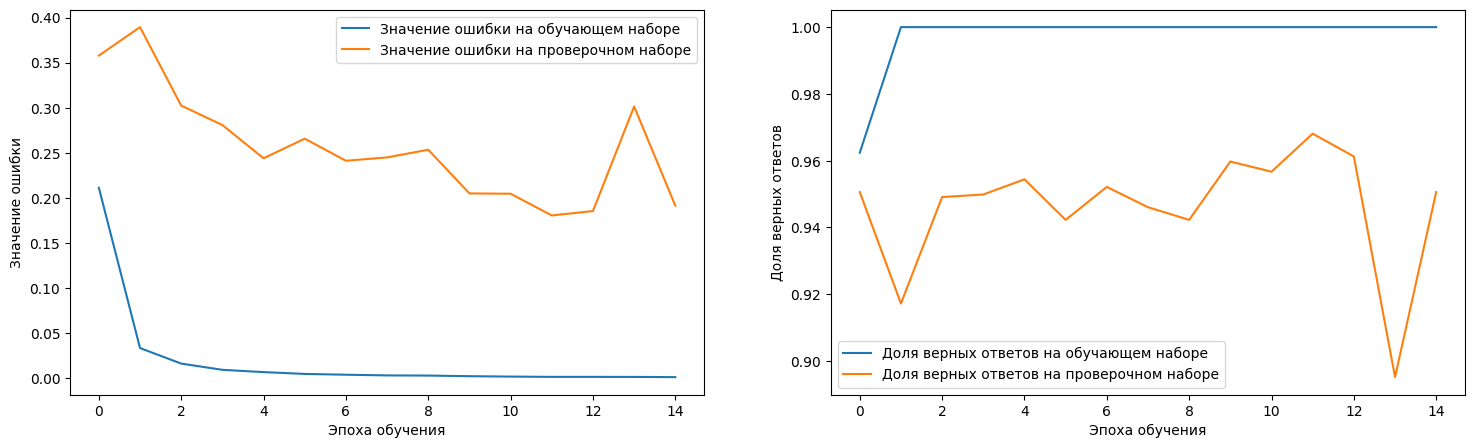

In [ ]:
test_ndx = 1; # Порядковй номер теста
win_size = 3000; # Длина отрезка текста (окна) в словах
for neurons in NEURONS:# Перебор числа неронов
  for vocab_size in VOCAB_SIZE_LST:# Размер словаря
    for win_hop in WIN_HOP_LST: # Шаг окна разбиения текста на векторы
      gc.collect() # Очистка памяти
      print (f'{test_ndx=}; {neurons=}; {vocab_size=}; {win_hop=}')# Параметры теста
      test_ndx+=1# Увеличили порядковый номер теста
      #Токенизация с текущими параметрами
      x_train, y_train, x_val, y_val = data_set_creater(vocab_size, text_train, text_test, win_hop, win_size)
      #Создание и обучение нейронки
      make_model (x_train, y_train, x_val, y_val, neurons, vocab_size)